Core Libraries:

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, AveragePooling2D, MaxPooling2D,
    ZeroPadding2D, Activation, Dense, Flatten, Input, Add, ReLU
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.applications import resnet
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import cv2
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.ndimage import rotate
import itertools
from keras.layers import Input, Conv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense, Add
from keras.models import Model
from keras.regularizers import l2
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from sklearn.metrics import accuracy_score,roc_curve,auc
from tensorflow.keras import layers, Model, applications
sns.set(style='white', context='notebook', palette='deep')

APDDv2 Dataset:

In [ ]:
!gdown --id 1ap5dhuEgpPC5PrJozAu2VFmUNIRZrar2 -O dataset.zip
!unzip dataset.zip -d apddv2_folder

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ap5dhuEgpPC5PrJozAu2VFmUNIRZrar2
From (redirected): https://drive.google.com/uc?id=1ap5dhuEgpPC5PrJozAu2VFmUNIRZrar2&confirm=t&uuid=890645f9-3017-4d7b-be1b-68e0b60b3b7d
To: /content/dataset.zip
100% 7.05G/7.05G [01:02<00:00, 113MB/s] 
Archive:  dataset.zip
replace apddv2_folder/0000d0cd38984fffb2c04f964edc9c88.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: apddv2_folder/0000d0cd38984fffb2c04f964edc9c88.png  
replace apddv2_folder/000ce20bcec24f29815a9496bf314c11.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: apddv2_folder/000ce20bcec24f29815a9496bf314c11.jpg  
replace apddv2_folder/000d472bde3c4f4c8dc9f66fede4d463.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
dataset_path = "./apddv2_folder"

#Check Dataset Size
num_files = sum(len(files) for _, _, files in os.walk(dataset_path))
print(f"Total Files in Dataset: {num_files}")
print("-" * 40)

# Show first 5 files per folder
for root, dirs, files in os.walk(dataset_path):
    print(f"Folder: {root}")
    for file in files[:5]:
        print(f"{file}")
    print("-" * 40)

#Show File Types
file_types = {}
for file in glob.glob(dataset_path + "/**/*", recursive=True):
    ext = os.path.splitext(file)[1]
    file_types[ext] = file_types.get(ext, 0) + 1

print("File Types Summary:")
for ext, count in file_types.items():
    print(f"{ext}: {count} files")


Total Files in Dataset: 10023
----------------------------------------
Folder: ./apddv2_folder
378ca7a30200418eb88c87405b03a327.jpg
f1c071bbcb36490e9451e8f528dc0422.png
42c6e40c77e648ff998b013da8e4ee47.png
58f5196a46e041328c886f913fd6a206.jpg
4b120f6c9d8742dc94288e06bf98810b.jpg
----------------------------------------
File Types Summary:
.jpg: 7001 files
.png: 2768 files
.JPG: 253 files
.jpeg: 1 files


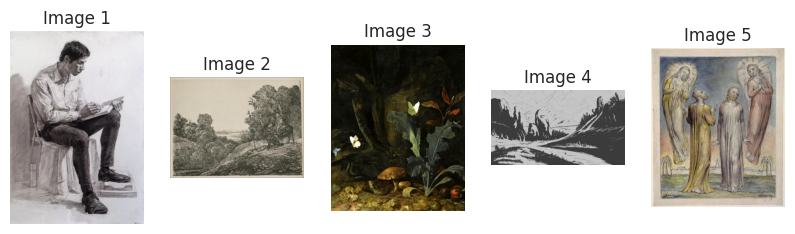

In [ ]:
image_files = glob.glob(dataset_path + "/**/*.jpg", recursive=True)[:5]

plt.figure(figsize=(10, 5))
for i, img_path in enumerate(image_files):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}")

plt.show()

In [ ]:
train_data = pd.read_csv('./apddv2_csvfiles/train.csv')
valid_data = pd.read_csv('./apddv2_csvfiles/valid.csv')
test_data = pd.read_csv('./apddv2_csvfiles/test.csv')
print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)
train_data.head()

(8019, 13)
(1002, 13)
(1002, 13)


,filename,Artistic Categories,Score,Theme and logic,Creativity,Layout and composition,Space and perspective,The sense of order,Light and shadow,Color,Details and texture,The overall,Mood
0,422028f2a0ed4cc2b24b6c21371dd3b7.png,oil painting*classicism*landscapes,1.833,3.83,NaN,3.00,3.00,3.67,3.00,3.00,3.00,2.83,3.00
1,e933c226087b498b8ef60f305db304c6.png,oil painting*classicism*landscapes,2.143,3.43,NaN,2.71,2.43,3.14,2.57,3.29,3.00,3.43,2.71
2,8a7152ff656a4676a3bb16440483ec7c.jpg,oil painting*classicism*landscapes,2.167,3.83,NaN,2.83,2.33,2.83,2.50,2.67,3.00,2.50,2.67
3,22fe91fd78584a6dadcb7fc50f8c4696.png,oil painting*classicism*landscapes,2.333,3.50,NaN,3.00,2.83,3.50,2.83,3.00,3.33,3.17,3.00
4,daf6f76f52f948e483d83d043a9c93be.jpg,oil painting*classicism*landscapes,2.571,3.86,NaN,3.43,3.29,3.29,3.29,3.00,3.29,3.29,3.14


In [ ]:
columns_to_drop = train_data.columns[[1,2,3,4,6,7,10,11,12]]
train_data = train_data.drop(columns=columns_to_drop)
valid_data = valid_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)
train_data.head()

,filename,Layout and composition,Light and shadow,Color
0,422028f2a0ed4cc2b24b6c21371dd3b7.png,3.00,3.00,3.00
1,e933c226087b498b8ef60f305db304c6.png,2.71,2.57,3.29
2,8a7152ff656a4676a3bb16440483ec7c.jpg,2.83,2.50,2.67
3,22fe91fd78584a6dadcb7fc50f8c4696.png,3.00,2.83,3.00
4,daf6f76f52f948e483d83d043a9c93be.jpg,3.43,3.29,3.00


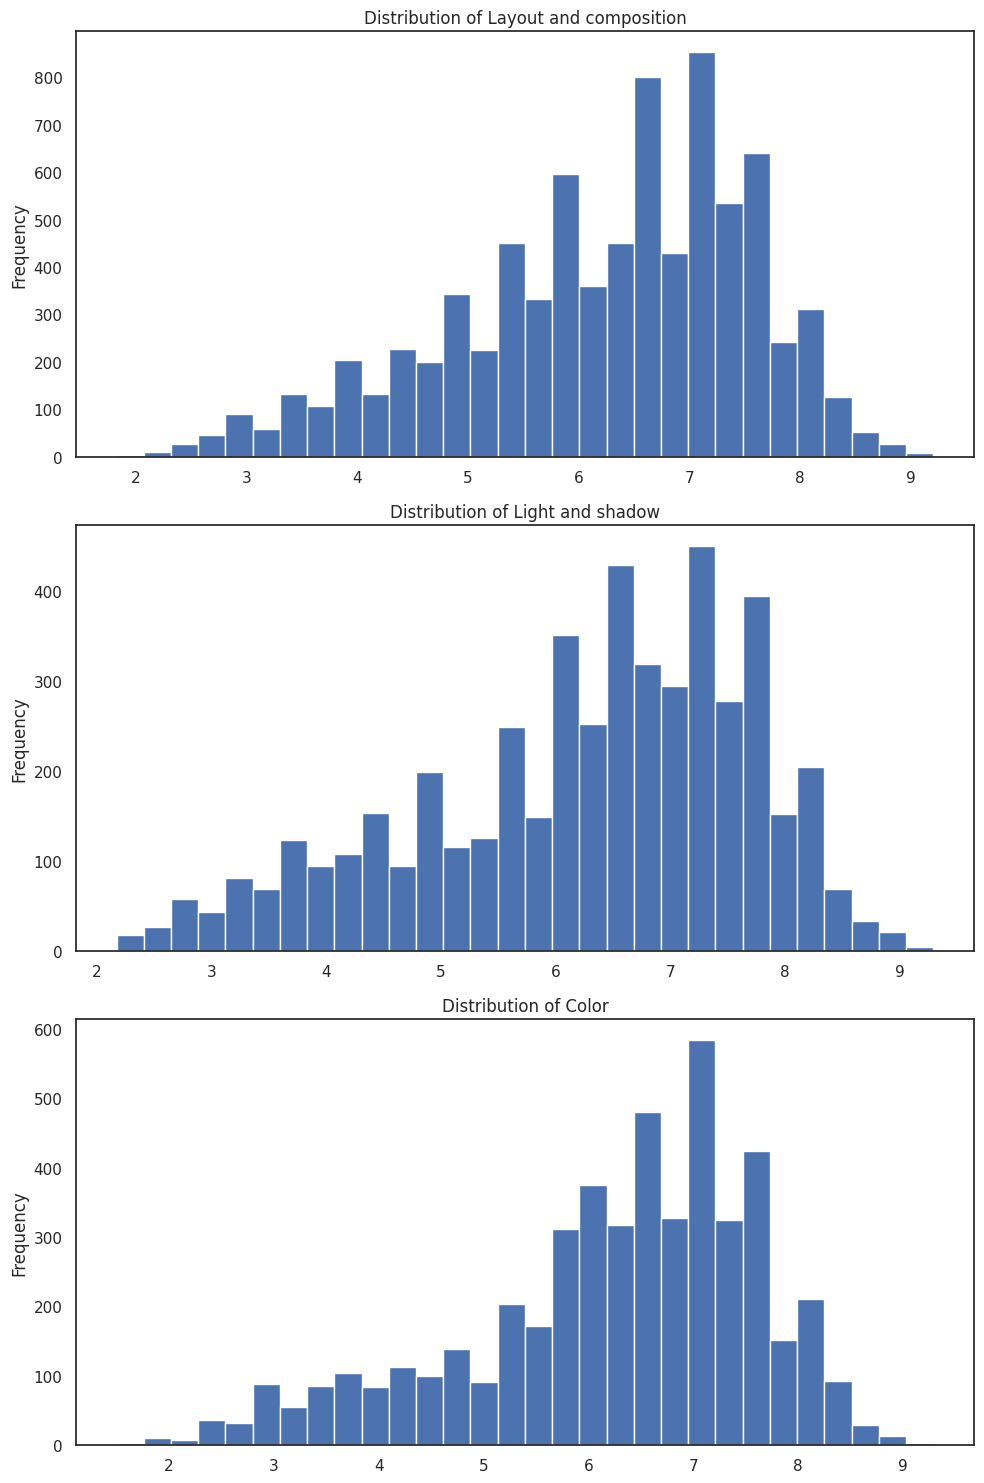

In [ ]:
#visualize the distribution of the scores
score_columns = train_data.columns[1:]
plt.figure(figsize=(10, 15))
for i, col in enumerate(score_columns, 1):
    plt.subplot(3, 1, i)
    train_data[col].plot(kind='hist', bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# Check for missing values
print(f"data:\n{train_data.isnull().sum()}\n")
print(f"data:\n{valid_data.isnull().sum()}\n")
print(f"data:\n{test_data.isnull().sum()}\n")
print("-" * 40)

# Identify invalid filenames
def find_invalid_filenames(dataframe, base_dir):
    invalid_files = []
    for _, row in dataframe.iterrows():
        filename = f"{row['filename']}"
        file_path = os.path.join(base_dir, filename)
        if not os.path.isfile(file_path):
            invalid_files.append(filename)
    return invalid_files

invalid_filenames_train = find_invalid_filenames(train_data, dataset_path)
print(f"Number of invalid files in train data: {len(invalid_filenames_train)}")
invalid_filenames_valid = find_invalid_filenames(valid_data, dataset_path)
print(f"Number of invalid files in valid data: {len(invalid_filenames_valid)}")
invalid_filenames_test = find_invalid_filenames(test_data, dataset_path)
print(f"Number of invalid files in test data: {len(invalid_filenames_test)}")

data:
filename                     0
Layout and composition       0
Light and shadow          3059
Color                     3057
dtype: int64

data:
filename                    0
Layout and composition      0
Light and shadow          380
Color                     383
dtype: int64

data:
filename                    0
Layout and composition      0
Light and shadow          380
Color                     382
dtype: int64

----------------------------------------
Number of invalid files in train data: 0
Number of invalid files in valid data: 0
Number of invalid files in test data: 0


In [ ]:
train_data['has_color'] = train_data['Color'].notnull().astype(int)
valid_data['has_color'] = valid_data['Color'].notnull().astype(int)
test_data['has_color'] = test_data['Color'].notnull().astype(int)

train_data['has_light_shadow'] = train_data['Light and shadow'].notnull().astype(int)
valid_data['has_light_shadow'] = valid_data['Light and shadow'].notnull().astype(int)
test_data['has_light_shadow'] = test_data['Light and shadow'].notnull().astype(int)

train_data.head()

,filename,Layout and composition,Light and shadow,Color,has_color,has_light_shadow
0,422028f2a0ed4cc2b24b6c21371dd3b7.png,3.00,3.00,3.00,1,1
1,e933c226087b498b8ef60f305db304c6.png,2.71,2.57,3.29,1,1
2,8a7152ff656a4676a3bb16440483ec7c.jpg,2.83,2.50,2.67,1,1
3,22fe91fd78584a6dadcb7fc50f8c4696.png,3.00,2.83,3.00,1,1
4,daf6f76f52f948e483d83d043a9c93be.jpg,3.43,3.29,3.00,1,1


In [ ]:
train_data.loc[train_data['has_color'] == 0, 'Color'] = -1
valid_data.loc[valid_data['has_color'] == 0, 'Color'] = -1
test_data.loc[test_data['has_color'] == 0, 'Color'] = -1

train_data.loc[train_data['has_light_shadow'] == 0, 'Light and shadow'] = -1
valid_data.loc[valid_data['has_light_shadow'] == 0, 'Light and shadow'] = -1
test_data.loc[test_data['has_light_shadow'] == 0, 'Light and shadow'] = -1

# Check again for missing values
print(f"data:\n{train_data.isnull().sum()}\n")
print(f"data:\n{valid_data.isnull().sum()}\n")
print(f"data:\n{test_data.isnull().sum()}\n")

data:
filename                  0
Layout and composition    0
Light and shadow          0
Color                     0
has_color                 0
has_light_shadow          0
dtype: int64

data:
filename                  0
Layout and composition    0
Light and shadow          0
Color                     0
has_color                 0
has_light_shadow          0
dtype: int64

data:
filename                  0
Layout and composition    0
Light and shadow          0
Color                     0
has_color                 0
has_light_shadow          0
dtype: int64



In [ ]:
def create_generator(df, datapath, generator,shuffle_flag):
    return generator.flow_from_dataframe(
        dataframe=df,
        directory=datapath,
        x_col='filename',
        y_col=['Layout and composition', 'Light and shadow', 'Color'],
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        shuffle=shuffle_flag
    )
def multi_output_generator(generator):
    for x, y in generator:
        yield x, {"Layout and composition": y[:, 0],"Light and shadow": y[:, 1],"Color": y[:, 2]}
# Apply augmentation on training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
)
train_generator = create_generator(train_data,dataset_path,train_datagen,True)
train_generator = multi_output_generator(train_generator)
# Validation generator
valid_datagen = ImageDataGenerator(
    rescale=1./255
)
valid_generator = create_generator(valid_data,dataset_path,valid_datagen,False)
valid_generator = multi_output_generator(valid_generator)
# Testing generator
test_datagen = ImageDataGenerator(
   rescale=1./255
)
test_generator = create_generator(test_data,dataset_path,test_datagen,False)
test_generator = multi_output_generator(test_generator)

Found 8019 validated image filenames.
Found 1002 validated image filenames.
Found 1002 validated image filenames.
